The goal of this exercise is to get into some first contact with Python, Pandas data frames, and the many opportunities how to quickly generate static charts from data frames. For the first exercise, load the provided CSV file, do some data cleaning, and check if your cleaning operation was successful using visualization.

The main purpose of the notebook is to preprocess the CSV file for further visualization. The following steps have to be performed: 

1. Read the three CSV using Pandas. See the pandas.read_csv documentation to check how to parse the CSV correctly! Merge the two datasets player_data_per_36_min.csv and players.csv into one table. Add a team_name column to your new data frame based on the team_id column retrieving the name from the teams.csv dataset. You should now have a table that includes player info from players.csv, and players performance statistics from player_data_per_36_min.csv, and the team’s name from teams.csv. (3 points)
2. Take care of missing values. Sci-kit learn provides different data imputation methods. Remove unusable rows or columns, if necessary.  Delete all observations for players who do not have a current team.
(Hint: You may need to impute before you completely filter your dataframe. You need to make an educated judgment). (3 points)
3. Create two new tables: one that groups rows based on player_id, another that groups rows based on team_id. (2 points)
4. Visualize the data (twice). Every submitted notebook should contain at least two visualizations using at least two different Python visualization libraries. One visualization for each data set (players and teams). A list of the most wide-spread Python visualization libraries can be found in this article. You must concisely describe and explain each visualization and your decisions in a Markdown field. You will not receive the points for this task if you did not add a description/explanation. (max. 5 points per visualization)
5. Save the resulting tables (players data, and aggregated teams data) as CSV. To be sure that the data is correctly saved, you can load it again. You will have to work with these table for the second exercise. (2 points)

## Task 1
#### Preprocessing explanation
Missing values in the statistics columns are replaced by 0, this is because

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

players = pd.read_csv("data/players.csv")
teams = pd.read_csv("data/teams.csv")
player_data = pd.read_csv("data/player_data_per_36_min.csv")

players = players.merge(player_data, left_on="id", right_on="player_id")
players = players.merge(teams[["team_id", "team_name"]], left_on="current_team_id", right_on="team_id", how="left")

players_unique = players.drop_duplicates(subset='id_x', keep='last').copy()

# print(players_unique.isna().sum()/len(players_unique.index))

players_unique[[
    'games_started', 'minutes_played', 'fg', 'fga', 'fgp', 
    'fg3', 'fg3a', 'fg3p', 'fg2', 'fg2a', 'fg2p', 'ft', 'fta', 'ftp', 
    'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts'
]] = players_unique[[
    'games_started', 'minutes_played', 'fg', 'fga', 'fgp', 
    'fg3', 'fg3a', 'fg3p', 'fg2', 'fg2a', 'fg2p', 'ft', 'fta', 'ftp', 
    'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts'
]].fillna(0)

columns_to_impute = [
    'games_started', 'minutes_played', 'fg', 'fga', 'fgp', 
    'fg3', 'fg3a', 'fg3p', 'fg2', 'fg2a', 'fg2p', 'ft', 'fta', 'ftp', 
    'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts'
]
imputer = SimpleImputer(strategy='median')
players_unique.loc[:, columns_to_impute] = imputer.fit_transform(players_unique[columns_to_impute])

players_filtered_unique = players_unique.dropna(subset=['current_team_id'])

display(players_filtered_unique.head())
print(f"Total players in the dataset after cleaning: {len(players_filtered_unique)}")

ModuleNotFoundError: No module named 'pandas'

### Task 3
`players_filtered_unique` already contains unique players only, therefore grouping by `player_id` is redundant.



In [ ]:

grouped_by_player = players_filtered_unique

grouped_by_team = players_filtered_unique.drop(["weight", "id_x", "id_y", "player_id", "current_team_id", "retired"], axis=1)
grouped_by_team = grouped_by_team.groupby(by=["team_id", "team_name"]).mean(numeric_only=True).reset_index()

grouped_by_player.to_csv("grouped_by_player.csv")
grouped_by_team.to_csv("grouped_by_team.csv")

print(f"Rows players dataset: {len(grouped_by_player)}")
print(f"Rows teams dataset: {len(grouped_by_team)}")
grouped_by_team.head()

Rows players dataset: 495
Rows teams dataset: 30


,team_id,team_name,total_games,games_started,minutes_played,fg,fga,fgp,fg3,fg3a,...,ftp,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,1.0,Atlanta Hawks,35.352941,17.705882,812.235294,5.494118,12.247059,0.456235,1.423529,4.417647,...,0.780294,1.870588,5.600000,7.470588,2.876471,1.129412,1.211765,2.188235,3.911765,14.864706
1,2.0,Boston Celtics,35.882353,15.882353,766.764706,5.835294,12.029412,0.482706,1.300000,3.970588,...,0.768706,1.588235,5.941176,7.523529,2.911765,1.258824,1.141176,2.105882,3.941176,15.305882
2,3.0,Brooklyn Nets,33.833333,19.333333,850.388889,5.627778,13.438889,0.428333,1.550000,4.838889,...,0.631278,1.338889,5.216667,6.550000,3.977778,1.350000,0.550000,2.083333,2.555556,15.100000
3,4.0,Charlotte Hornets,34.200000,18.466667,832.133333,4.900000,10.873333,0.421733,1.186667,3.606667,...,0.664867,1.853333,4.946667,6.800000,2.680000,1.046667,0.646667,1.820000,3.160000,13.053333
4,5.0,Chicago Bulls,35.529412,16.470588,795.117647,6.158824,13.323529,0.472000,1.711765,5.223529,...,0.714176,2.252941,4.182353,6.423529,2.658824,1.382353,0.664706,1.664706,3.488235,16.252941


## Task 4

### Visualization for grouped by player using Seaborn
The visualization is a horizontal barplot showcasing the top 5 point scorers on average per game. The players are mapped on the y axis and the points per game on the x axis. Additionally their current team is mapped to the hue of each players bar. The legend lets the user know which color corresponds to which team. A horizontal view of the barplot was chosen so that the names can be displayed as axis labels more easily.

,id_x,name,full_name,position,height,weight,birth_date,birth_place,retired,player_url,...,drb,trb,ast,stl,blk,tov,pf,pts,team_id,team_name
673,112,Giannis Antetokounmpo,Giannis Antetokounmpo,F-G,6-11,242.0,December 6 1994,"Athens, Greece",False,/players/a/antetgi01.html,...,12.9,15.7,6.8,1.3,1.2,4.2,3.6,35.0,17.0,Milwaukee Bucks
9680,1715,James Harden,James Edward Harden Jr.,G,6-5,220.0,August 26 1989,"Los Angeles, California",False,/players/h/hardeja01.html,...,5.3,6.3,7.2,1.6,1.0,4.3,3.3,34.3,11.0,Houston Rockets
6322,1084,Luka Dončić,Luka Dončić,G-F,6-7,218.0,February 28 1999,"Ljubljana, Slovenia",False,/players/d/doncilu01.html,...,8.9,10.5,9.5,1.1,0.2,4.6,2.7,31.7,7.0,Dallas Mavericks
26600,4774,Trae Young,Rayford Trae Young,G,6-1,180.0,September 19 1998,"Lubbock, Texas",False,/players/y/youngtr01.html,...,3.9,4.4,9.3,1.2,0.1,5.0,1.7,30.7,1.0,Atlanta Hawks
14095,2513,Kawhi Leonard,Kawhi Leonard,F,6-7,230.0,June 29 1991,"Riverside, California",False,/players/l/leonaka01.html,...,7.2,8.3,5.9,2.0,0.8,3.4,2.1,30.1,13.0,Los Angeles Clippers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2724,466,Jarrell Brantley,Jarrell Isaiah Brantley,F,6-5,250.0,June 7 1996,"Charleston, South Carolina",False,/players/b/brantja01.html,...,16.4,16.4,3.3,0.0,6.5,3.3,3.3,0.0,29.0,Utah Jazz
24911,4487,Quinndary Weatherspoon,Quinndary Vonta Weatherspoon,G,6-3,207.0,September 10 1996,"Canton, Mississippi",False,/players/w/weathqu01.html,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,San Antonio Spurs
10450,1841,Kevin Hervey,Kevin Hervey,F,6-9,230.0,July 9 1996,"Arlington, Texas",False,/players/h/herveke01.html,...,5.5,5.5,2.8,0.0,0.0,0.0,2.8,0.0,21.0,Oklahoma City Thunder
11095,1951,William Howard,William Howard,F,6-8,205.0,October 25 1993,"Montbrison, France",False,/players/h/howarwi01.html,...,5.5,5.5,2.8,0.0,0.0,2.8,2.8,0.0,11.0,Houston Rockets


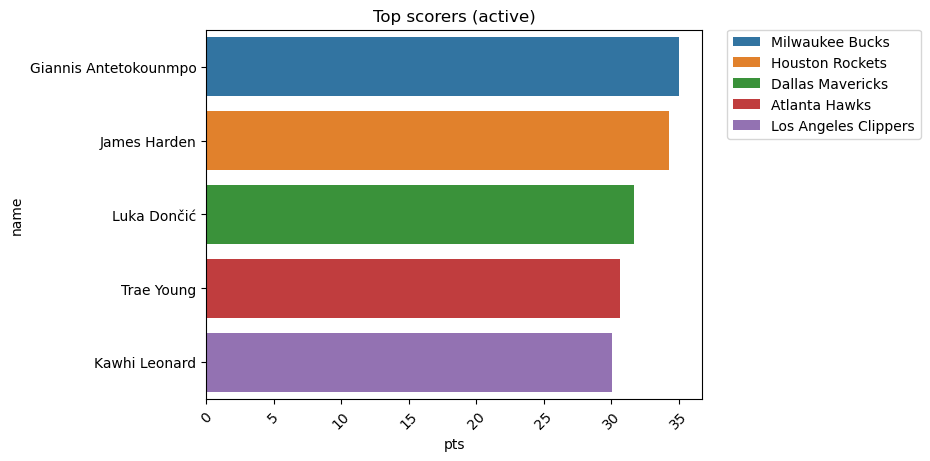

In [ ]:
active_players_sorted_ft = players_filtered_unique[players_filtered_unique["retired"] == False].sort_values("pts", ascending= False)
display(active_players_sorted_ft)
sns.barplot(active_players_sorted_ft.head(5), x="pts", y="name", hue="team_name").set_title("Top scorers (active)")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

### Top Active Scorers in the NBA

This horizontal bar chart illustrates the points scored by active top scorers in the NBA. Each bar represents a player and the length corresponds to the total points scored. 
The chart clearly shows the scoring prowess of these individuals in comparison to each other.

### Visualization for grouped by team
This scatter plot tries to explore any correlation between the average personal fouls per game a team conducts and the success of that team as the points per game. 

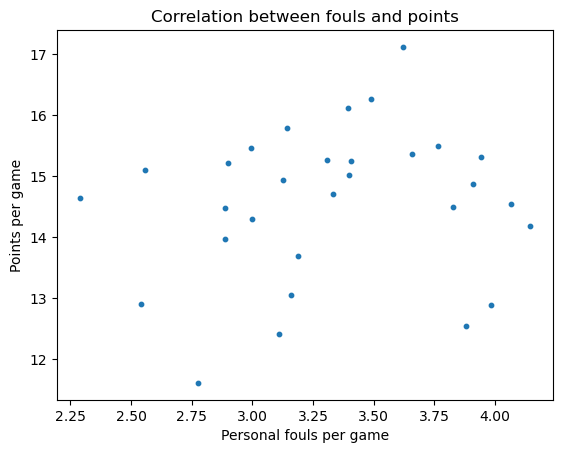

In [ ]:
plt.scatter(grouped_by_team["pf"], grouped_by_team["pts"], s=10)
plt.xlabel('Personal fouls per game')
plt.ylabel('Points per game')
plt.title('Correlation between fouls and points')
    
plt.show()

### Analysis of Personal Fouls and Scoring

The scatter plot above explores the potential correlation between the average number of personal fouls a player commits per game and the average points scored per game. Each dot represents an observation point with the x-axis showing personal fouls per game ranging from 2.25 to 4.00, and the y-axis representing points per game from 12 to 17.

Observations:
- The distribution of points does not indicate a clear trend or correlation with the number of personal fouls.
- There's a wide spread of points scored across different levels of personal fouls per game, suggesting a weak or no linear relationship between the two variables.